# МАТЕМАТИЧНЕ МОДЕЛЮВАННЯ МАТЕРІАЛІВ ТА ТЕХНОЛОГІЧНИХ ПРОЦЕСІВ В МАТЕРІАЛОЗНАВСТВІ
Комп'ютерний практикум

*Виконав студент групи ФМ-71мп*

*Богомаз Ростислав*

## ІДЕНТИФІКАЦІЙНІ МАТЕМАТИЧНІ МОДЕЛІ. МЕТОД НАЙМЕНШИХ КВАДРАТІВ

**Мета роботи:** освоєння комп’ютерної реалізації багатовимірного методу
найменших квадратів для побудови ідентифікаційних регресійних математичних моделей.

### Завдання та вихідні дані
Побудувати математичну модель, використовуючи дані багатофакторного
експерименту і методику покрокового регресійного аналізу, яка базується на
багатовимірному варіанті методу найменших квадратів. Визначити адекватність моделі.
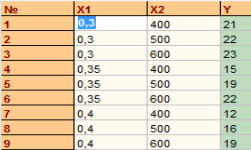

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.DataFrame({'X1': [0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.4, 0.4, 0.4],
                   'X2': [400, 500, 600, 400, 500, 600, 400, 500, 600],
                   'Y': [21, 22, 23, 15, 19, 22, 12, 16, 19]})

### Порядок виконання

In [5]:
X = df.iloc[:,df.columns != 'Y']
Y = df['Y']

In [6]:
df.corr()['Y']

X1   -0.734400
X2    0.618442
Y     1.000000
Name: Y, dtype: float64

In [7]:
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_predictions = regressor.predict(X)

Будуємо графік:

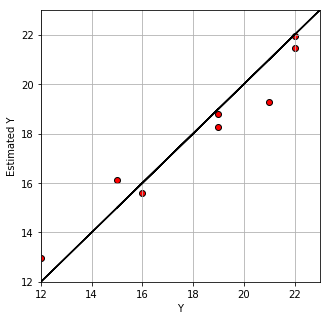

In [13]:
plt.figure(figsize=(5,5))
plt.plot(Y, Y, color='black')
plt.scatter(Y, y_predictions, color="red", alpha=1, edgecolor='black')
plt.xlim(Y.min(), Y.max())
plt.ylim(Y.min(), Y.max())
plt.grid()
plt.xlabel('Y')
plt.ylabel('Estimated Y')

In [14]:
metrics.mean_squared_error(Y, y_predictions)

0.96913580246913589

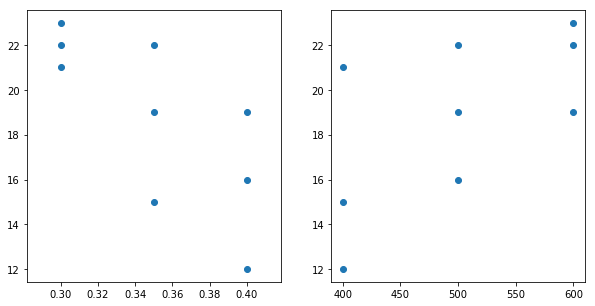

In [18]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(df.X1, df.Y)
ax[1].scatter(df.X2, df.Y)